1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

In [62]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m)
print("The mean of the total array is: ",np.mean(m))
print()
for i in range(3):
    print("The mean of the row", i+1, "is: ",np.mean(m[i]))
print()
for i in range(4):
    print("The mean of the column", i+1, "is: ",np.mean(m[:,i]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
The mean of the total array is:  5.5

The mean of the row 1 is:  1.5
The mean of the row 2 is:  5.5
The mean of the row 3 is:  9.5

The mean of the column 1 is:  4.0
The mean of the column 2 is:  5.0
The mean of the column 3 is:  6.0
The mean of the column 4 is:  7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [63]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
b = np.outer(u,v)
print("The matrix obtained with the outer function is: \n",b)
ut = u.reshape(4,1)

l = np.array([[u[j]*v[i] for i in range(4)] for j in range(4)])
print("The matrix obtained with the list comprehension is: \n",l)
##########broadcasting
g = u.reshape(4,1)*v
print("The matrix obtained with the broadcasting is: \n",g)
if b.any()==l.any()==g.any():
    print("The three methods are equivalent")
else:
    print("Something is wrong!!!")

The matrix obtained with the outer function is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The matrix obtained with the list comprehension is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The matrix obtained with the broadcasting is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The three methods are equivalent


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [64]:
b = npr.uniform(0., 3.,(10,6))
print("The original matrix is: \n",b)
b[b<0.3]= 0.
print("The modified matrix is: \n",b)

The original matrix is: 
 [[2.63211056 2.63478739 1.17900765 2.70431645 1.84184201 2.51750038]
 [2.70028476 1.87411793 2.38309266 2.38992609 0.14502091 1.74374843]
 [1.58285725 0.74826981 2.85516661 1.64689487 2.15475641 2.35273483]
 [2.33172742 2.04423129 0.89946064 0.8849701  1.50750106 1.47272143]
 [2.26718168 1.65282311 2.21551738 1.72730014 1.99537738 1.61544197]
 [2.81030949 0.6584718  0.75452637 0.03580873 0.11392758 2.76888247]
 [0.7999045  2.15412979 2.12685538 1.8998726  0.82786823 2.00848482]
 [2.61931907 2.9381135  1.79403665 1.67331195 0.78164031 0.63994704]
 [1.30867491 0.4243569  2.38213299 2.39701025 1.52591144 0.87471014]
 [1.13069456 0.66364972 1.76905228 0.01014992 2.9065996  2.72932861]]
The modified matrix is: 
 [[2.63211056 2.63478739 1.17900765 2.70431645 1.84184201 2.51750038]
 [2.70028476 1.87411793 2.38309266 2.38992609 0.         1.74374843]
 [1.58285725 0.74826981 2.85516661 1.64689487 2.15475641 2.35273483]
 [2.33172742 2.04423129 0.89946064 0.8849701  1.50

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

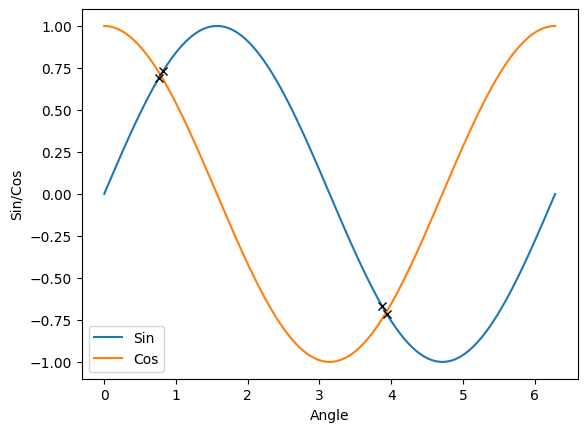

In [67]:
n = np.linspace(0,2* np.pi,100,True )
print(n)
#extraction of every 10th element
c = np.array([n[i*9] for i in range(12)])
print("The 10th elements of the initial array are: \n",c)
#reversion of the array
d=np.array([n[-i-1] for i in range (100)])
print("The reversed array is: \n",d)
#some checks to see if the reversion succeced
for i in range(100):
    if n[i]==d[-i-1] and len(n)==len(d):
        print("Operation successfull!!!")
        break
    else:
        print("Try again!!!")

print(np.abs(np.cos(n)-np.sin(n)))


f = n[np.abs(np.cos(n)-np.sin(n))<0.1]
print("The elements that fullfil the condiition imposed by the problem are: \n",f)

plt.xlabel("Angle")
plt.ylabel("Sin/Cos")
plt.plot(n, np.sin(n))
plt.plot(n, np.cos(n))
plt.plot(f, np.sin(f), 'x', color = 'k')
plt.legend(['Sin', 'Cos'])

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [68]:
u = np.array([i+1 for i in range(10)])
v = np.array([j+1 for j in range(10)])

tabel = np.outer(u,v)
print("The multiplication table is:\n ",tabel)

#for loop for trace calculation
summa = 0
for i in range(10):
    for j in range(10):
        if i== j:
            summa += tabel[i][j]       
        else:
            pass

print("The trace of the matrix is:",summa)
#Anti-diagonal matrix elements
m = np.array([tabel[i][-j-1] for i in range(10) for j in range(10) if i==j])
print("The anti-diagonal matrix elements are: ",m)
n = np.array([tabel[i][j+1] for i in range(10) for j in range(9) if i==j])
print("The diagonal matrix elements offset by 1 upwards are:",n)

The multiplication table is:
  [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
The trace of the matrix is: 385
The anti-diagonal matrix elements are:  [10 18 24 28 30 30 28 24 18 10]
The diagonal matrix elements offset by 1 upwards are: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [69]:
u = np.array([0.,198,303,736,871,1175,1475,1544,1913,2448])
v = np.array([0.,198,303,736,871,1175,1475,1544,1913,2448])
miles = np.array([[np.abs(u[i]-v[j]) for i in range(10)] for j in range(10)])
print("The grid of distances in miles is: \n",miles)
print()
km = np.array(miles*1.6)
print("The grid of distances in km is: \n",km)

The grid of distances in miles is: 
 [[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]

The grid of distances in km is: 
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [139

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [71]:
N = 100
a = np.arange(N)

def my_alg(N):
    a = np.arange(N)
    mask = np.array([True for i in range(N)])
    for i in range(2, N):
        for j in range(i+1, N):
             if(mask[j] == True):
                mask[j] = (a[j] % i != 0)
    return mask
    
print(a[my_alg(N)])
%timeit primes = a[my_alg(N)]

[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
11.3 ms ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [72]:
N1 = 200
b = np.arange(N1)
print(b[my_alg(N1)])
%timeit b[my_alg(N1)]

[  0   1   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53
  59  61  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139
 149 151 157 163 167 173 179 181 191 193 197 199]
46.6 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
N2 = 400
c = np.arange(N2)
print(c[my_alg(N2)])
%timeit c[my_alg(N2)]


[  0   1   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53
  59  61  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139
 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239
 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349
 353 359 367 373 379 383 389 397]
184 ms ± 4.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
N3 = 750
d = np.arange(N3)
print(d[my_alg(N3)])
%timeit d[my_alg(N3)]

[  0   1   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53
  59  61  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139
 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239
 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349
 353 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457
 461 463 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577
 587 593 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683
 691 701 709 719 727 733 739 743]
652 ms ± 4.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
N4 = 1000
e = np.arange(N4)
print(e[my_alg(N4)])
%timeit e[my_alg(N4)]

[  0   1   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53
  59  61  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139
 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239
 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349
 353 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457
 461 463 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577
 587 593 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683
 691 701 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821
 823 827 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941
 947 953 967 971 977 983 991 997]
1.16 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


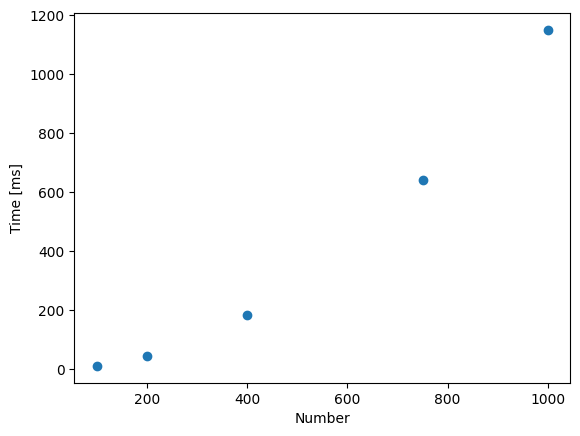

In [59]:
x = [N,N1,N2,N3,N4]
y = [11.3,45.3,184,641,1150]
plt.scatter(x,y)
plt.xlabel("Number")
plt.ylabel("Time [ms]")
plt.show()
# It seems to be a quadratic dependence 

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

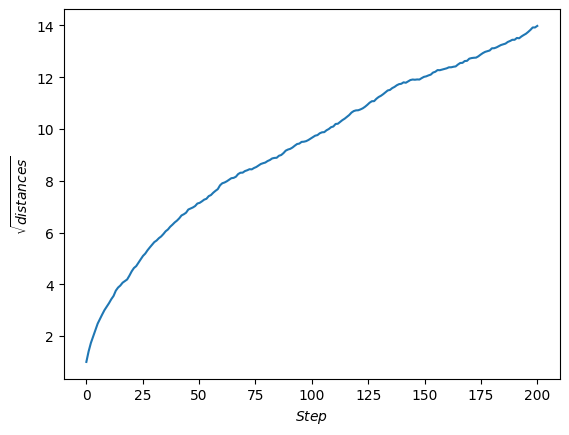

In [76]:
walkers_x = np.zeros((1000,200))
for i in range(walkers_x.shape[0]):
        mat = np.random.randint(-1,1,size=walkers_x.shape[1]) 
        mat[mat==0]=1
        walkers_x[i] = mat


sums_x = np.cumsum(walkers_x, axis=1)
sq_sums_x = sums_x**2

means_x = np.mean(sq_sums_x**0.5, axis=1)
means_x = np.mean(sq_sums_x, axis=0)

x = np.linspace(0, 200, 200)

plt.plot(x, np.sqrt(means_x))

plt.ylabel('$ \sqrt{distances} $')
plt.xlabel("$Step$")
plt.show()